# 数据分析

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import cx_Oracle as oracle

import os 
os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_CHINA.UTF8' 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
conn = oracle.connect('NNSCUSER','NNSCUSER','192.168.1.171/orcl')

In [4]:
table_name = ['CMP3$97678',
              'MT_CF_PAGEQUERY',
              'MT_CF_QUERYCHART',
              'MT_CF_QUERYCOLUMNALARM',
              'MT_CF_QUERYCOLUMNS',
              'MT_CF_QUERYFUNCTION',
              'MT_CF_QUERYSINGCHART',
              'MT_DC_CONVEYANCE_PRODUCTION',
              'MT_DC_PB_MACHINEAREA',
              'MT_DC_PB_MACHINEGROUP',
              'MT_DC_PB_PARAMCODE',
              'MT_DC_PB_REJECTCODE',
              'MT_DC_PB_REJECTTYPE',
              'MT_DC_PB_REQUESTCODE',
              'MT_DC_PB_STATUSCODE',
              'MT_DC_PB_STOPCODE',
              'MT_DC_PB_WASTECODE',
              'MT_DC_PB_WEIGHT_CODE',
              'MT_DC_PM_LONGSTOPCODE',
              'MT_DC_PM_MP_FILETYPE',
              'MT_DC_PM_MP_GD102DATA_CUR',
              'MT_DC_PM_MP_GD1057DATA_CUR',
              'MT_DC_PM_MP_PT102DATA_CUR',
              'MT_DC_PM_MP_PT1057DATA_CUR',
              'MT_DC_PM_MP_TS102DATA',
              'MT_DC_ZX102_CUR',
              'MT_PB_CLASS',
              'MT_PB_INFOCLASS',
              'MT_PB_ISVALID',
              'MT_PB_MACHINE',
              'MT_PB_MACHINECLASS',
              'MT_PB_MACHINEPART',
              'MT_PB_MACHINESTATUS',
              'MT_PB_MACHINETYPE',
              'MT_PB_MACHINETYPEPART',
              'MT_PB_NEWSTYPE',
              'MT_PB_NOTICEBOARD',
              'MT_PB_NOTICERECEIVE',
              'MT_PB_ORG',
              'MT_PB_POST',
              'MT_PB_PRODUCT',
              'MT_PB_PRODUCTCATENA',
              'MT_PB_SHIFT',
              'MT_PB_SHIFTARRANGE',
              'MT_PB_UNIT',
              'MT_QL_PARAMETER',
              'TEST_DATA',
              'TEST_MAIN']

tables = {}
table_num = [7, 11, 15, 20, 21, 22, 23, 25, 29, 40, 46, 47, 1, 2, 4, 6, 10, 14, 16, 17, 30, 32, 33]
for n in table_num:
    tn = table_name[n]
    sql = 'select * from ' + tn
    df = pd.read_sql(sql, conn)
    tables[tn] = df
    df.to_csv(tn + '.csv')

In [5]:
tb_20 = tables[table_name[20]]
tb_21 = tables[table_name[21]]
tb_22 = tables[table_name[22]]
tb_23 = tables[table_name[23]]
tb_46 = tables[table_name[46]]
tb_47 = tables[table_name[47]]
tb_07 = tables[table_name[7]]
tb_25 = tables[table_name[25]]

## 表20  MT_DC_PM_MP_GD102DATA_CUR  包装机生产数据

In [6]:
tb_20_new = tb_20[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'INTERNALSTOPTIME',
                   'RUNTIME', 'PRODUCETIME', 'THEORETICALPRODUCTION','REALPRODUCTION', 'REJECTPRODUCTION',
                   'EFFPRODUCTION', 'EFFMACHINE', 'STOPCNT']]
tb_20_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,EFFPRODUCTION,EFFMACHINE,STOPCNT
0,2015-11-11,3,202,10001586,2015-11-12 07:20:04,1568,24467,22155,158153,126910,180,80.0,73.0,21
1,2015-11-11,3,202,10001586,2015-11-12 07:20:04,3832,22203,22203,164888,126932,1094,77.0,77.0,80
2,2015-11-11,3,215,10001586,2015-11-12 07:20:01,2094,23941,20477,150473,124130,120,82.0,72.0,25
3,2015-11-11,3,215,10001586,2015-11-12 07:20:02,5632,20403,20403,164888,123815,977,75.0,75.0,258
4,2015-11-11,3,220,10001586,2015-11-12 07:20:04,3969,22066,20322,161940,113730,190,70.0,66.0,33


In [7]:
tb_20_new.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,EFFPRODUCTION,EFFMACHINE,STOPCNT
count,49939.000000,4.993900e+04,49939.000000,49939.000000,49939.000000,4.993900e+04,49939.000000,49939.000000,49939.000000,49939.000000,49939.000000
mean,1.935181,9.663523e+06,5396.070726,18404.745429,17062.487695,1.459484e+05,92001.079777,506.259617,53.574981,50.335770,60.923527
std,0.815677,1.807462e+06,6821.613849,11097.963199,10770.830878,8.273825e+04,56122.385853,3918.965302,31.864031,30.361754,64.167066
min,1.000000,8.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000159e+07,1761.000000,15569.000000,12752.500000,1.559095e+05,40593.000000,1.000000,28.000000,25.000000,11.000000
50%,2.000000,1.000159e+07,4101.000000,22409.000000,21000.000000,1.723330e+05,115680.000000,200.000000,67.000000,63.000000,29.000000
75%,3.000000,1.000159e+07,6779.000000,24752.000000,23237.000000,1.798850e+05,136580.500000,450.000000,79.000000,74.000000,115.000000
max,3.000000,1.000159e+07,322123.000000,359632.000000,359958.000000,4.050453e+06,199694.000000,112573.000000,175.000000,110.000000,433.000000


In [8]:
tb_20_clear = tb_20_new.query('INTERNALSTOPTIME < 50000 & RUNTIME < 50000 & PRODUCETIME < 50000 & THEORETICALPRODUCTION < 500000 & REJECTPRODUCTION < 20000')

In [9]:
tb_20_clear.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,EFFPRODUCTION,EFFMACHINE,STOPCNT
count,49806.000000,4.980600e+04,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000,49806.000000
mean,1.935470,9.662620e+06,5345.535277,18260.239810,16921.006365,144566.691242,92195.596093,346.214010,53.714091,50.466651,61.045296
std,0.815626,1.809790e+06,5666.294488,9528.303532,9133.726269,64440.467625,56038.145825,467.849943,31.792056,30.295977,64.182733
min,1.000000,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000159e+07,1772.000000,15545.250000,12739.500000,155860.750000,41670.000000,1.000000,29.000000,26.000000,11.000000
50%,2.000000,1.000159e+07,4109.000000,22399.000000,20990.000000,172306.000000,115810.000000,200.000000,67.000000,63.000000,29.000000
75%,3.000000,1.000159e+07,6780.000000,24738.000000,23225.000000,179885.000000,136610.000000,450.000000,79.000000,74.000000,116.000000
max,3.000000,1.000159e+07,30777.000000,34136.000000,30997.000000,261554.000000,199694.000000,13459.000000,175.000000,110.000000,433.000000


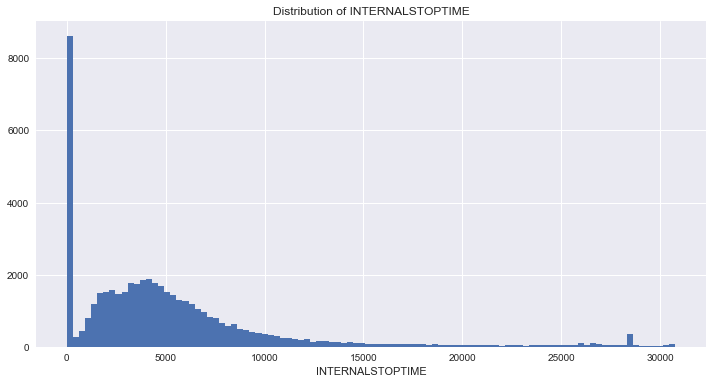

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'INTERNALSTOPTIME'], 100)
plt.title('Distribution of INTERNALSTOPTIME')  
plt.xlabel('INTERNALSTOPTIME')  
plt.show()

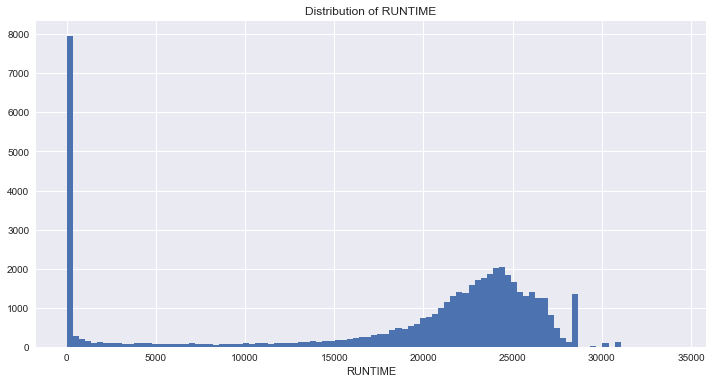

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'RUNTIME'], 100)
plt.title('Distribution of RUNTIME')  
plt.xlabel('RUNTIME')  
plt.show()

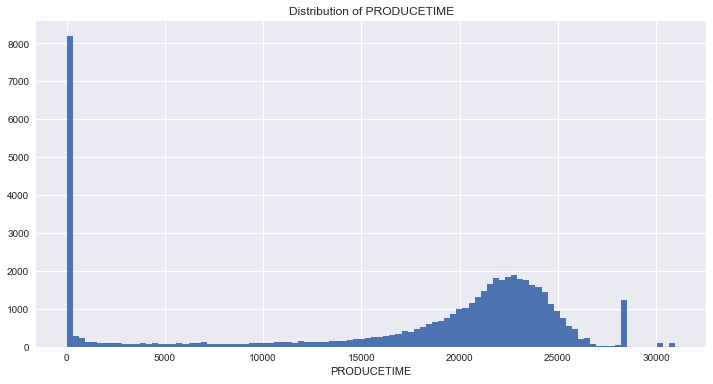

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'PRODUCETIME'], 100)
plt.title('Distribution of PRODUCETIME')  
plt.xlabel('PRODUCETIME')  
plt.show()

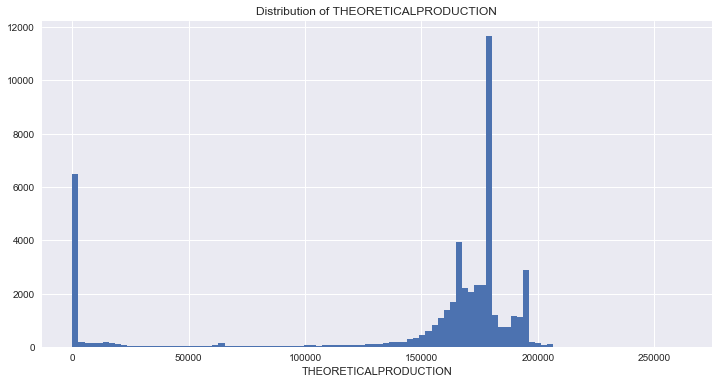

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'THEORETICALPRODUCTION'], 100)
plt.title('Distribution of THEORETICALPRODUCTION')  
plt.xlabel('THEORETICALPRODUCTION')  
plt.show()

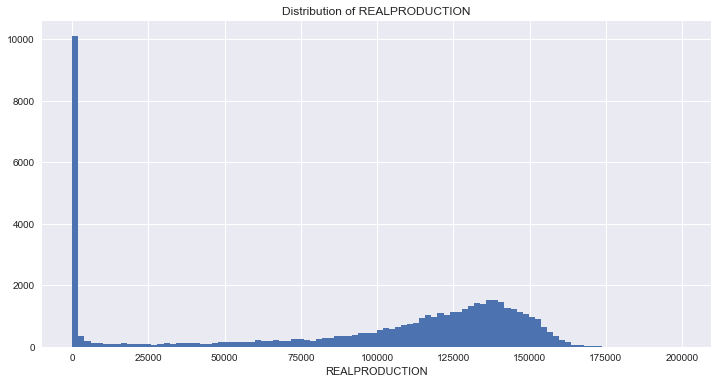

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'REALPRODUCTION'], 100)
plt.title('Distribution of REALPRODUCTION')  
plt.xlabel('REALPRODUCTION')  
plt.show()

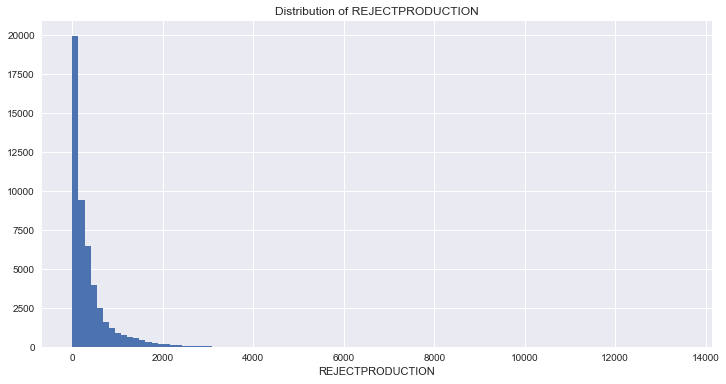

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'REJECTPRODUCTION'], 100)
plt.title('Distribution of REJECTPRODUCTION')  
plt.xlabel('REJECTPRODUCTION')  
plt.show()

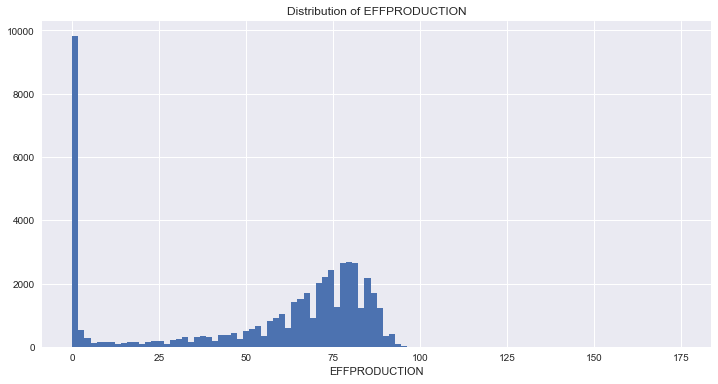

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_new.loc[:, 'EFFPRODUCTION'], 100)
plt.title('Distribution of EFFPRODUCTION')  
plt.xlabel('EFFPRODUCTION')  
plt.show()

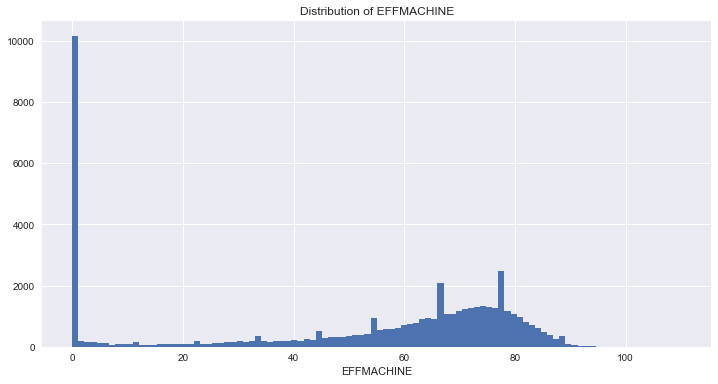

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_new.loc[:, 'EFFMACHINE'], 100)
plt.title('Distribution of EFFMACHINE')  
plt.xlabel('EFFMACHINE')  
plt.show()

## 表22  MT_DC_PM_MP_PT102DATA_CUR  卷接机生产数据

In [18]:
tb_22_new = tb_22[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'TOTALPRODUCTION', 'FILTERTIP',
                   'TOTALWASTE', 'TOTALWASTEPCT', 'EFFMACHINE', 'EFFPRODUCTION', 'MACHINESPEED', 'RUNTIME',
                   'TOTALSTOPTIME', 'TOTALSTOPCNT']]
tb_22_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
0,2015-11-13,1,115,10001586,2015-11-13 15:59:59,2,742,2377,0.09,97.1,97.1,7196,28980,2160,34
1,2015-11-13,1,102,10001586,2015-11-13 16:00:02,2,680,5643,0.19,90.4,90.4,7246,27720,3420,37
2,2015-11-13,1,113,10001586,2015-11-13 15:59:58,3,813,16812,0.59,96.8,103.7,7269,29700,1440,22
3,2015-11-13,1,101,10001586,2015-11-13 16:00:08,3,784,26052,0.86,102.4,102.4,0,28980,2160,12
4,2015-11-13,1,119,10001586,2015-11-13 16:01:06,0,0,1574,0.43,5.8,8.2,6738,2880,28260,26


In [19]:
tb_22_new.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,27216.000000,2.721600e+04,2.721600e+04,2.721600e+04,2.721600e+04,27216.000000,27216.000000,27216.000000,27216.000000,2.721600e+04,2.721600e+04,27216.000000
mean,1.923464,9.974759e+06,1.976893e+03,2.856430e+05,-1.982773e+04,0.905003,64.512223,66.462258,1559.283620,1.550284e+04,-2.409689e+04,25.437757
std,0.815872,5.173004e+05,3.727964e+04,3.096492e+05,4.901820e+06,5.446357,32.591417,42.594206,2855.060325,1.087346e+05,5.207393e+06,16.849040
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-8.085829e+08,0.000000,-658.000000,-998.800000,0.000000,-1.708733e+07,-8.590543e+08,0.000000
25%,1.000000,1.000159e+07,2.000000e+00,4.247500e+02,3.262000e+03,0.180000,53.300000,57.200000,0.000000,1.140000e+04,2.820000e+03,15.000000
50%,2.000000,1.000159e+07,1.450000e+03,6.320700e+04,6.487000e+03,0.320000,72.600000,76.400000,0.000000,2.118000e+04,4.800000e+03,23.000000
75%,3.000000,1.000159e+07,2.539000e+03,6.190392e+05,1.064900e+04,0.510000,83.400000,86.370000,7.000000,2.412000e+04,7.800000e+03,34.000000
max,3.000000,1.000159e+07,3.523215e+06,3.470277e+06,2.318017e+06,100.000000,970.800000,970.800000,23241.000000,2.248200e+05,3.560400e+06,218.000000


In [20]:
tb_22_clear = tb_22_new.query('TOTALPRODUCTION < 1000000 & FILTERTIP < 1500000 & TOTALWASTE > 0 & RUNTIME > 0 & TOTALSTOPTIME > 0')

In [21]:
tb_22_clear.describe()

,PB_SHIFT_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,23770.000000,2.377000e+04,23770.000000,2.377000e+04,2.377000e+04,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000
mean,1.938494,1.000074e+07,1745.256374,3.228796e+05,1.081982e+04,0.823159,68.552623,71.746935,1656.569079,19736.185528,6358.416996,27.853260
std,0.808264,9.174030e+04,4648.947508,3.105930e+05,7.074405e+04,4.500000,24.953539,31.465607,2907.117918,7258.839684,5005.176991,15.883988
min,1.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,-998.800000,0.000000,47.000000,60.000000,0.000000
25%,1.000000,1.000159e+07,2.000000,5.870000e+02,4.012000e+03,0.210000,59.300000,63.742500,0.000000,17100.000000,3240.000000,17.000000
50%,2.000000,1.000159e+07,1900.000000,3.275090e+05,7.034500e+03,0.340000,74.000000,78.000000,0.000000,22080.000000,4980.000000,25.000000
75%,3.000000,1.000159e+07,2602.000000,6.403972e+05,1.100375e+04,0.520000,83.700000,86.900000,992.000000,24480.000000,7620.000000,35.000000
max,3.000000,1.000159e+07,335545.000000,1.377188e+06,2.318017e+06,100.000000,797.000000,743.400000,23241.000000,224820.000000,38760.000000,218.000000


### 单台设备生产数据

In [22]:
tb22_dt = tb_22_clear.query("PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
191,2015-11-11,1,101,10001586,2015-11-11 15:59:56,2,598,24686,1.03,77.9,82.0,6946,25440,5700,36
209,2015-11-11,2,101,10001586,2015-11-11 23:58:01,2,750,23268,0.82,98.4,98.4,0,25920,2700,25
228,2015-11-11,3,101,10001586,2015-11-12 00:05:45,2,750,23268,0.82,98.0,98.0,0,25920,2820,25
235,2015-11-11,3,101,10001586,2015-11-12 04:08:23,1,354,17642,1.24,94.0,94.0,7230,12900,1980,32
236,2015-11-11,3,101,10001586,2015-11-12 04:27:25,1,389,18346,1.18,94.7,94.7,7232,14040,1980,32
237,2015-11-11,3,101,10001586,2015-11-12 07:21:34,2,644,30463,1.19,90.3,90.3,0,22620,3660,57
248,2015-11-12,1,101,10001586,2015-11-12 16:00:02,2,713,25907,0.91,92.9,92.9,0,27720,3240,33
262,2015-11-12,2,101,10001586,2015-11-12 17:12:05,0,87,2870,0.83,80.0,80.0,6245,3840,420,3
273,2015-11-12,2,101,10001586,2015-11-13 00:00:04,2,688,26577,0.97,89.6,89.6,0,24360,4380,37
291,2015-11-12,3,101,10001586,2015-11-13 07:20:05,2,647,16394,0.63,90.8,90.8,0,23460,2880,11


### 单台设备有生产数据的天数

In [23]:
tb22_dt.groupby('PRODUCEDATE').size()

PRODUCEDATE
2003-12-31     2
2015-11-11     6
2015-11-12     4
2015-11-13     4
2015-11-14     5
2015-11-15     1
2015-11-16     3
2015-11-17     3
2015-11-26     3
2015-11-27     7
2015-11-28     3
2015-11-29     4
2015-11-30     2
2015-12-01     5
2015-12-02     2
2015-12-03     5
2015-12-04     8
2015-12-05     8
2015-12-06     1
2015-12-07    11
2015-12-08     6
2015-12-09     8
2015-12-10    11
2015-12-11     4
2015-12-12    12
2015-12-14     5
2015-12-15     6
2015-12-16     5
2015-12-17     3
2015-12-18     7
              ..
2017-06-10     3
2017-06-12     2
2017-06-13     3
2017-06-14     3
2017-06-15     3
2017-06-16     2
2017-06-26     1
2017-06-27     3
2017-06-28     2
2017-07-04     2
2017-07-05     3
2017-07-06     3
2017-07-07     3
2017-07-08     3
2017-07-10     2
2017-07-11     3
2017-07-12     3
2017-07-13     3
2017-07-14     2
2017-07-15     3
2017-07-17     2
2017-07-18     3
2017-07-19     3
2017-07-20     2
2017-07-21     2
2017-07-24     2
2017-07-25     2
20

### 设备101早班生产数据

In [24]:
tb22_dt1 = tb_22_clear.query("PB_SHIFT_ID == 1 & PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt1

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
191,2015-11-11,1,101,10001586,2015-11-11 15:59:56,2,598,24686,1.03,77.9,82.0,6946,25440,5700,36
248,2015-11-12,1,101,10001586,2015-11-12 16:00:02,2,713,25907,0.91,92.9,92.9,0,27720,3240,33
3,2015-11-13,1,101,10001586,2015-11-13 16:00:08,3,784,26052,0.86,102.4,102.4,0,28980,2160,12
60,2015-11-14,1,101,10001586,2015-11-14 15:52:32,2,693,15650,0.57,92.2,99.4,7229,27660,3060,24
679,2015-11-15,1,101,10001586,2015-11-15 15:54:10,2,678,18077,0.64,90.0,92.9,0,26160,4620,17
767,2015-11-17,1,101,10001586,2015-11-17 15:59:10,2,687,10858,0.39,90.1,90.1,7230,25800,5280,17
856,2015-11-27,1,101,10001586,2015-11-27 08:34:54,0,59,1501,0.64,39.5,54.4,7212,2100,2400,6
871,2015-11-27,1,101,10001586,2015-11-27 09:39:09,0,175,2225,0.32,62.6,78.8,7210,5940,2400,6
872,2015-11-27,1,101,10001586,2015-11-27 11:58:47,1,368,3635,0.25,65.9,78.9,7140,13380,3360,8
875,2015-11-27,1,101,10001586,2015-11-27 14:56:46,2,555,5528,0.25,60.6,71.4,6041,20520,6900,13


In [25]:
tb22_dt1.query("PRODUCEDATE == '2016-07-08'")

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
10247,2016-07-08,1,101,10001586,2016-07-08 08:57:16,296,74754,2564,0.86,58.8,67.5,7044,2580,1140,4
10250,2016-07-08,1,101,10001586,2016-07-08 09:00:12,311,78350,2648,0.85,59.7,68.6,7048,2760,1140,4
10249,2016-07-08,1,101,10001586,2016-07-08 09:00:12,311,78318,2648,0.85,59.7,68.6,7047,2760,1140,4
10251,2016-07-08,1,101,10001586,2016-07-08 09:00:13,311,78543,2650,0.85,59.8,68.6,7046,2760,1140,4
10252,2016-07-08,1,101,10001586,2016-07-08 09:41:34,483,121877,4743,0.98,56.3,64.5,6467,4260,2160,7
10257,2016-07-08,1,101,10001586,2016-07-08 09:42:56,492,124112,4758,0.97,56.6,64.9,6617,4320,2160,7
10258,2016-07-08,1,101,10001586,2016-07-08 10:42:54,670,169151,7144,1.03,50.5,57.8,6280,6000,3900,13
10385,2016-07-08,1,101,10001586,2016-07-08 10:44:13,680,171527,7187,1.05,50.8,58.1,7152,6120,3900,13
10386,2016-07-08,1,101,10001586,2016-07-08 10:52:48,739,186343,7423,1.00,52.5,60.1,7047,6600,3900,13
10387,2016-07-08,1,101,10001586,2016-07-08 10:59:18,784,197657,7676,0.98,53.7,61.5,7048,7020,3900,13


### 设备101中班生产数据

In [26]:
tb22_dt2 = tb_22_clear.query("PB_SHIFT_ID == 2 & PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt2

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
209,2015-11-11,2,101,10001586,2015-11-11 23:58:01,2,750,23268,0.82,98.4,98.4,0,25920,2700,25
262,2015-11-12,2,101,10001586,2015-11-12 17:12:05,0,87,2870,0.83,80.0,80.0,6245,3840,420,3
273,2015-11-12,2,101,10001586,2015-11-13 00:00:04,2,688,26577,0.97,89.6,89.6,0,24360,4380,37
19,2015-11-13,2,101,10001586,2015-11-13 19:24:15,1,325,10568,0.91,116.0,116.0,6612,11580,600,6
28,2015-11-13,2,101,10001586,2015-11-14 00:00:09,3,779,23502,0.79,101.8,101.8,0,26940,1800,15
146,2015-11-14,2,101,10001586,2015-11-15 00:00:15,2,632,14127,0.56,82.7,88.9,7242,22080,6660,24
738,2015-11-16,2,101,10001586,2015-11-16 22:13:34,2,578,11104,0.48,99.9,99.9,7230,20340,2040,17
742,2015-11-16,2,101,10001586,2015-11-17 00:00:06,3,764,13060,0.43,99.9,99.9,0,26520,2220,18
430,2015-11-17,2,101,10001586,2015-11-17 16:05:51,2,688,10865,0.39,90.1,90.1,7231,25860,5280,17
434,2015-11-17,2,101,10001586,2015-11-17 20:36:41,1,321,7262,0.66,78.7,78.7,7229,12840,3720,18


### 设备101夜班生产数据

In [27]:
tb22_dt3 = tb_22_clear.query("PB_SHIFT_ID == 3 & PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt3

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
228,2015-11-11,3,101,10001586,2015-11-12 00:05:45,2,750,23268,0.82,98.0,98.0,0,25920,2820,25
235,2015-11-11,3,101,10001586,2015-11-12 04:08:23,1,354,17642,1.24,94.0,94.0,7230,12900,1980,32
236,2015-11-11,3,101,10001586,2015-11-12 04:27:25,1,389,18346,1.18,94.7,94.7,7232,14040,1980,32
237,2015-11-11,3,101,10001586,2015-11-12 07:21:34,2,644,30463,1.19,90.3,90.3,0,22620,3660,57
291,2015-11-12,3,101,10001586,2015-11-13 07:20:05,2,647,16394,0.63,90.8,90.8,0,23460,2880,11
45,2015-11-13,3,101,10001586,2015-11-14 07:01:58,2,667,22451,0.84,97.8,97.8,7233,22800,2460,13
172,2015-11-14,3,101,10001586,2015-11-15 00:56:51,0,69,1620,0.58,84.9,84.9,7237,2940,420,4
176,2015-11-14,3,101,10001586,2015-11-15 05:16:52,2,517,9635,0.47,104.6,104.6,7237,17880,1080,10
182,2015-11-14,3,101,10001586,2015-11-15 07:20:17,2,708,12267,0.43,99.6,99.6,0,24180,2160,13
753,2015-11-16,3,101,10001586,2015-11-17 07:20:07,2,703,14024,0.50,98.6,98.6,7233,24480,1860,18


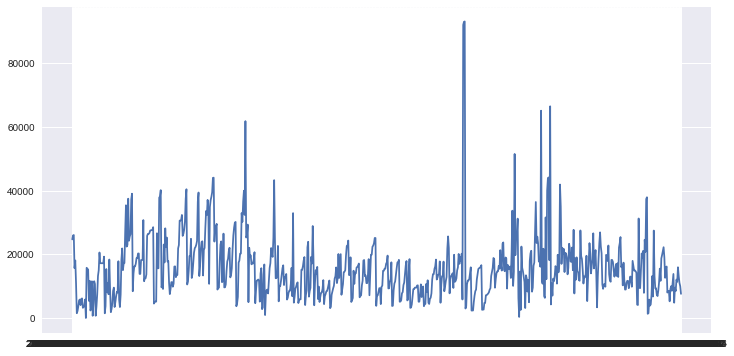

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt1['GATHERDATETIME'], tb22_dt1['TOTALWASTE'])
plt.show()

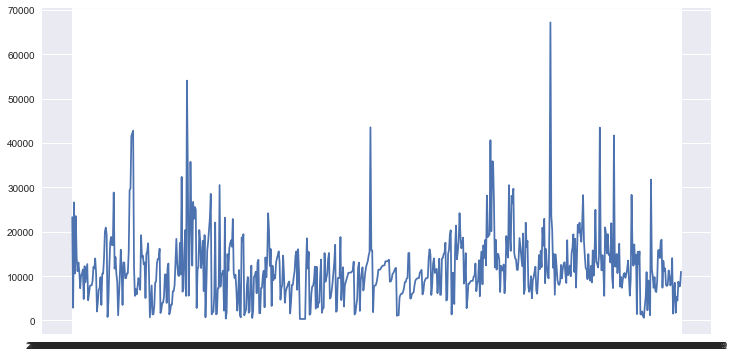

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt2['GATHERDATETIME'], tb22_dt2['TOTALWASTE'])
plt.show()

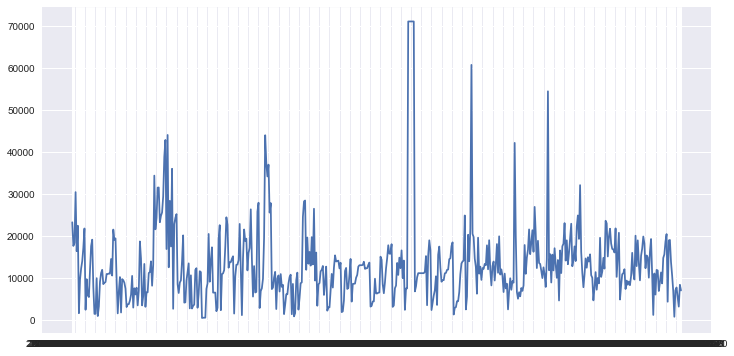

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt3['GATHERDATETIME'], tb22_dt3['TOTALWASTE'])
plt.show()

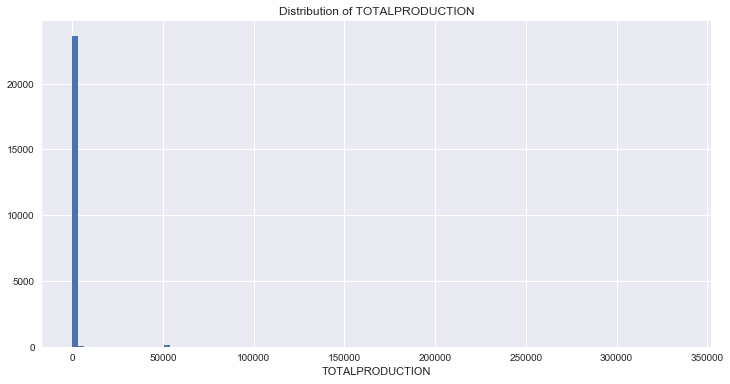

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(tb_22_clear.loc[:, 'TOTALPRODUCTION'], 100)
plt.title('Distribution of TOTALPRODUCTION')  
plt.xlabel('TOTALPRODUCTION')  
plt.show()

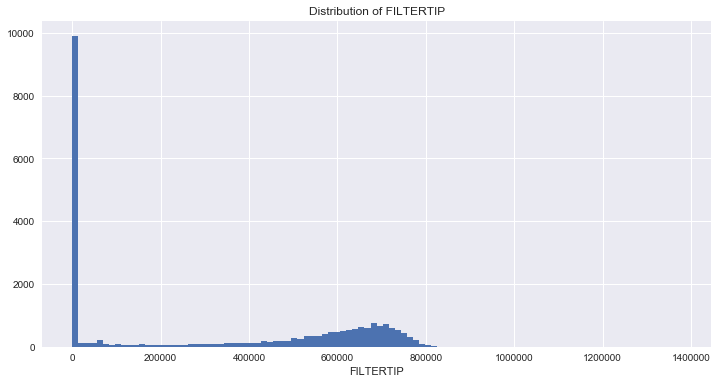

In [32]:
plt.figure(figsize=(12, 6))
plt.hist(tb_22_clear.loc[:, 'FILTERTIP'], 100)
plt.title('Distribution of FILTERTIP')  
plt.xlabel('FILTERTIP')  
plt.show()

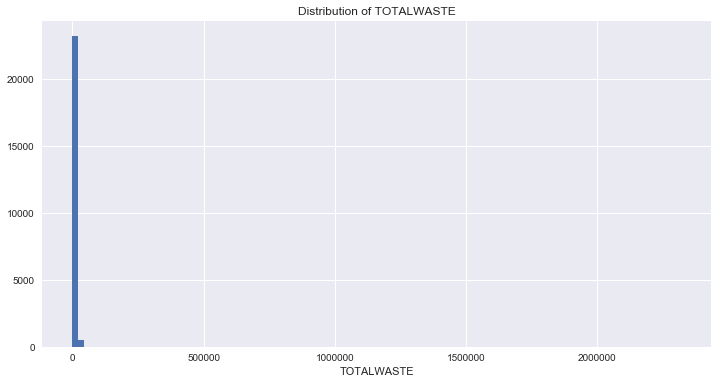

In [33]:
plt.figure(figsize=(12, 6))
plt.hist(tb_22_clear.loc[:, 'TOTALWASTE'], 100)
plt.title('Distribution of TOTALWASTE')  
plt.xlabel('TOTALWASTE')  
plt.show()

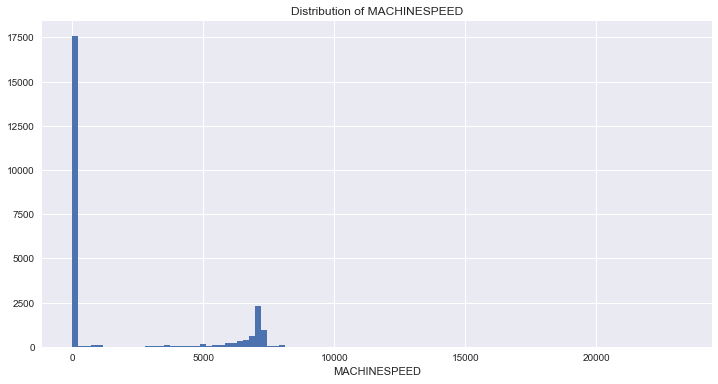

In [34]:
plt.figure(figsize=(12, 6))
plt.hist(tb_22_clear.loc[:, 'MACHINESPEED'], 100)
plt.title('Distribution of MACHINESPEED')  
plt.xlabel('MACHINESPEED')  
plt.show()

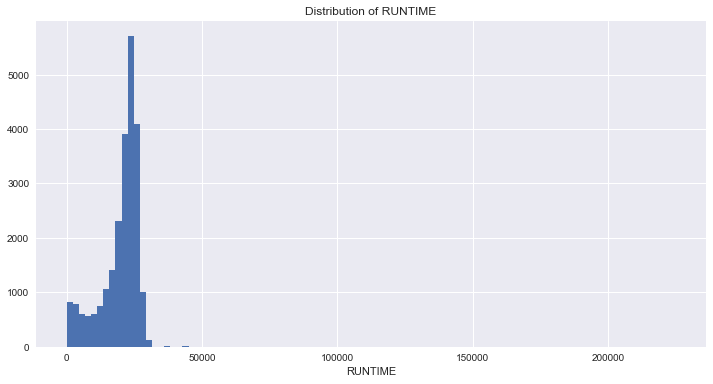

In [35]:
plt.figure(figsize=(12, 6))
plt.hist(tb_22_clear.loc[:, 'RUNTIME'], 100)
plt.title('Distribution of RUNTIME')  
plt.xlabel('RUNTIME')  
plt.show()

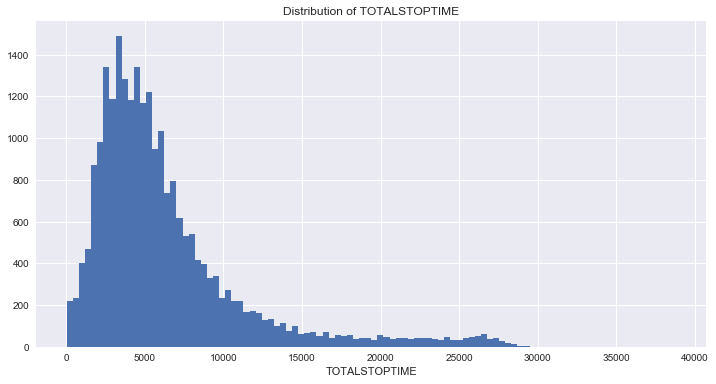

In [36]:
plt.figure(figsize=(12, 6))
plt.hist(tb_22_clear.loc[:, 'TOTALSTOPTIME'], 100)
plt.title('Distribution of TOTALSTOPTIME')  
plt.xlabel('TOTALSTOPTIME')  
plt.show()

## 表46、47  TEST_DATA  检测数据

In [37]:
tb_46_new = tb_46[['MACH_ID', 'TEST_ID', 'WEIGHT_VALUE', 'CIRCLE_VALUE', 'LENGTH_VALUE', 'PD_VALUE']]
tb_46_new.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [38]:
tb_47_new = tb_47[['MACH_ID', 'TEST_ID', 'SAMPLE_NAME']]
tb_47_new.head()

,MACH_ID,TEST_ID,SAMPLE_NAME
0,test5,2015-09-30 08:23:12,利群（新版）
1,test5,2015-09-30 08:36:33,利群（新版）
2,test5,2015-10-05 18:11:39,利群（新版）
3,test5,2015-10-05 18:28:22,真龙（珍品）
4,test5,2015-10-05 19:24:29,利群（新版）


In [39]:
tb_46_new.describe()

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
count,1.778490e+06,1.778490e+06,1.778490e+06,1.778490e+06
mean,8.250566e+01,1.165480e+02,1.172544e+02,1.062808e+02
std,8.997589e+02,9.563260e+02,5.660304e+02,1.024406e+03
min,-2.630000e-01,-1.183101e+01,0.000000e+00,-1.382426e+04
25%,8.660000e-01,2.445243e+01,8.389790e+01,1.062865e+00
50%,8.890000e-01,2.449948e+01,8.402699e+01,1.114208e+00
75%,9.080000e-01,2.454295e+01,8.417740e+01,1.175851e+00
max,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


In [40]:
droped = tb_46_new[(tb_46_new['WEIGHT_VALUE'] <= 0) | (tb_46_new['CIRCLE_VALUE'] <= 0) | 
                   (tb_46_new['LENGTH_VALUE'] <= 0) | (tb_46_new['PD_VALUE'] <= 0) | 
                  (tb_46_new['WEIGHT_VALUE'] > 10) | (tb_46_new['CIRCLE_VALUE'] > 100) | 
                   (tb_46_new['LENGTH_VALUE'] > 100) | (tb_46_new['PD_VALUE'] > 10)]

In [41]:
tb_46_clear = tb_46_new.append(droped).drop_duplicates(keep=False)
tb_46_clear.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [42]:
tb_46_clear.describe()

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
count,1.758586e+06,1.758586e+06,1.758586e+06,1.758586e+06
mean,8.679906e-01,2.401078e+01,8.486033e+01,1.149287e+00
std,9.384089e-02,1.890823e+00,3.191901e+00,1.966377e-01
min,1.590000e-01,9.250043e-01,6.266360e+01,1.431033e-04
25%,8.660000e-01,2.445192e+01,8.389820e+01,1.062350e+00
50%,8.890000e-01,2.449871e+01,8.402690e+01,1.113208e+00
75%,9.070000e-01,2.454149e+01,8.417621e+01,1.173314e+00
max,2.220000e+00,6.561050e+01,9.999297e+01,3.815260e+00


In [43]:
tb_46_mg = pd.merge(tb_46_clear, tb_47_new, how='left')
tb_46_mg.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685,真龙(凌云)1401
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758,真龙(凌云)1401
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607,真龙(凌云)1401
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378,真龙(凌云)1401
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983,真龙(凌云)1401


### 品牌质量数据样本排行

In [44]:
tb_46_mg.groupby('SAMPLE_NAME').size().sort_values(ascending=False)

SAMPLE_NAME
利群（新版）          423768
利群[新版]          234557
利群(新版)          154889
真龙（珍品）          115336
真龙(珍品)           88103
真龙(软娇子)1601      87748
真龙（娇子）1502       74963
真龙(凌云)1501       57999
真龙(鸿韵)1501       43825
真龙(凌云)1401       42629
真龙（娇子)1502       34933
大红鹰(软蓝)          32364
雄狮（硬）            28338
真龙（娇子）1501       26559
真龙(软娇子)          24750
利群(无硬度)          24079
雄狮[硬]            23188
真龙（轩云）           15149
大红鷹(軟蓝)沒硬度       13929
真龙(娇子)           13208
真龙[软娇子]1401      12547
真龙（娇子)           10915
雄狮(硬）            10523
真龙（软娇子）1601       9165
雄狮红               8820
真龙（娇子）            8275
真龙珍品              8206
真龙(燃情时光)1401      7257
真龙（天翔）1501        6615
真龙(娇子)1502        5665
                 ...  
dahongying         175
清云                 170
真龙[起源]             150
真龙壮丽               141
龙行天下1701           140
hy                 140
比对棒0010            135
zl                 112
真龙（真男儿）            110
甲天下（山水）            100
溯源比对棒0008           90
溯源比对棒               89

### 真龙(珍品)质量数据

In [45]:
tb_46_mg.query("SAMPLE_NAME == '真龙(珍品)'")

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME
649114,test1,2016-03-22 10:36:501210GD093,0.903,24.570927,84.076599,1.143278,真龙(珍品)
649141,test1,2016-03-22 12:57:281210GD093,0.929,24.564024,84.391205,1.266163,真龙(珍品)
649142,test1,2016-03-22 12:57:281210GD093,0.874,24.488245,84.061005,1.112823,真龙(珍品)
649143,test1,2016-03-22 12:57:281210GD093,0.893,24.517584,83.802902,1.116029,真龙(珍品)
649144,test1,2016-03-22 12:57:281210GD093,0.890,24.582537,83.888702,1.060597,真龙(珍品)
649145,test1,2016-03-22 12:57:281210GD093,0.895,24.575634,83.896103,1.112957,真龙(珍品)
649146,test1,2016-03-22 12:57:281210GD093,0.885,24.510525,84.055000,1.133928,真龙(珍品)
649147,test1,2016-03-22 12:57:281210GD093,0.912,24.558218,84.176804,1.227828,真龙(珍品)
649148,test1,2016-03-22 12:57:281210GD093,0.857,24.489029,83.834404,1.092788,真龙(珍品)
649149,test1,2016-03-22 12:57:281210GD093,0.896,24.607168,84.089302,1.169992,真龙(珍品)


In [46]:
tb_46_mg.query("SAMPLE_NAME == '真龙(珍品)'").mean()

WEIGHT_VALUE     0.904876
CIRCLE_VALUE    24.521063
LENGTH_VALUE    84.006629
PD_VALUE         1.140775
dtype: float64

### 单台设备质量数据

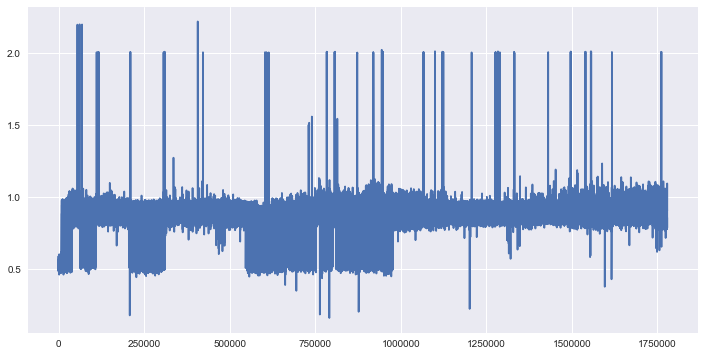

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(tb_46_clear['WEIGHT_VALUE'])
plt.show()

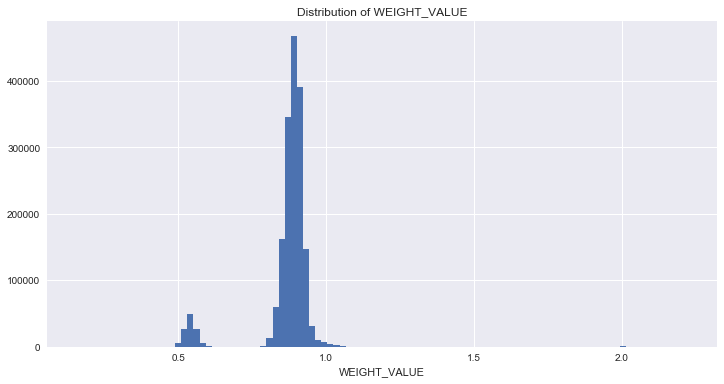

In [48]:
plt.figure(figsize=(12, 6))
plt.hist(tb_46_clear.loc[:, 'WEIGHT_VALUE'], 100)
plt.title('Distribution of WEIGHT_VALUE')  
plt.xlabel('WEIGHT_VALUE')  
plt.show()

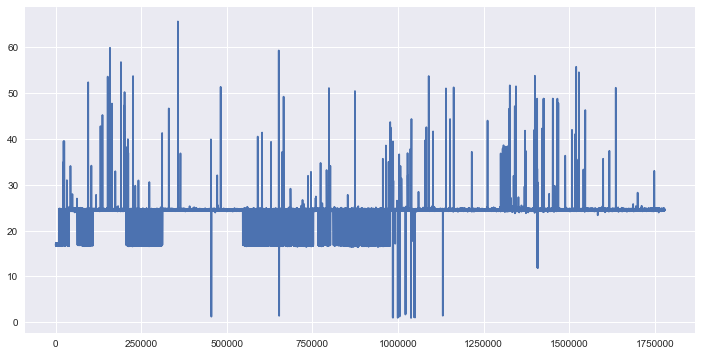

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(tb_46_clear['CIRCLE_VALUE'])
plt.show()

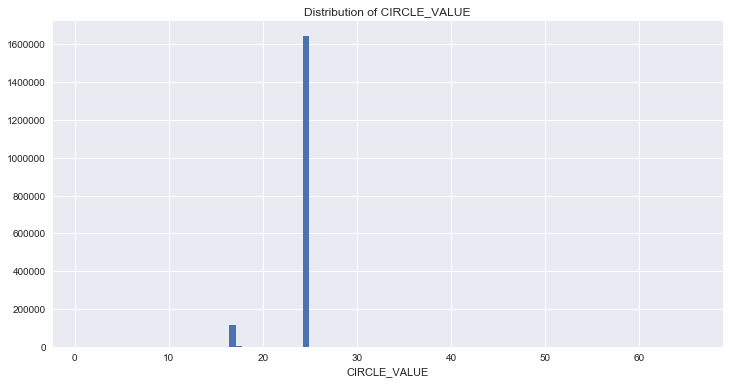

In [50]:
plt.figure(figsize=(12, 6))
plt.hist(tb_46_clear.loc[:, 'CIRCLE_VALUE'], 100)
plt.title('Distribution of CIRCLE_VALUE')  
plt.xlabel('CIRCLE_VALUE')  
plt.show()

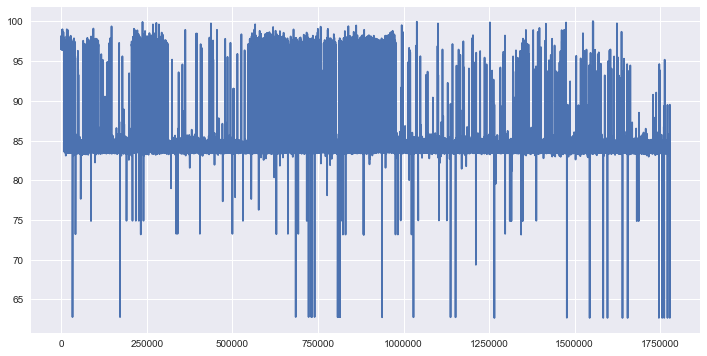

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(tb_46_clear['LENGTH_VALUE'])
plt.show()

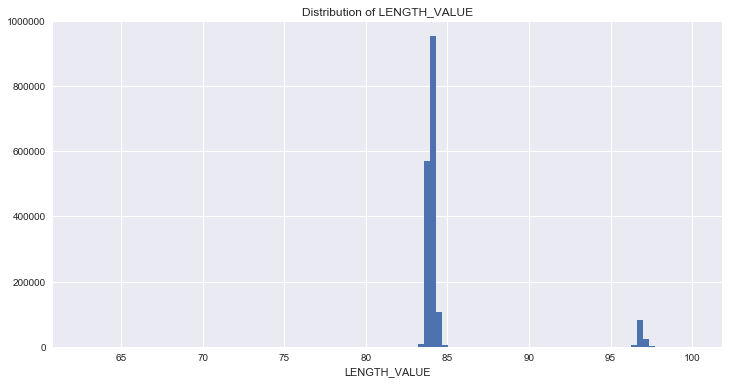

In [52]:
plt.figure(figsize=(12, 6))
plt.hist(tb_46_clear.loc[:, 'LENGTH_VALUE'], 100)
plt.title('Distribution of LENGTH_VALUE')  
plt.xlabel('LENGTH_VALUE')  
plt.show()

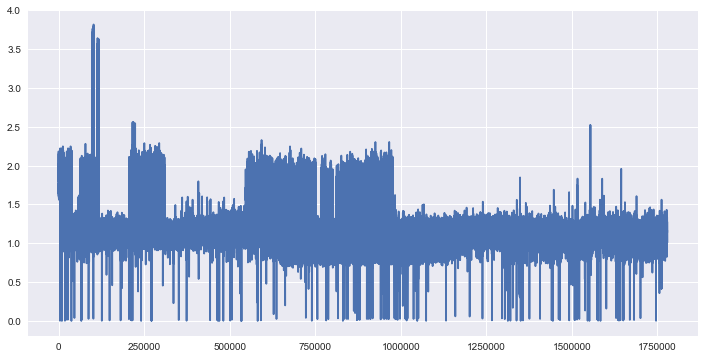

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(tb_46_clear['PD_VALUE'])
plt.show()

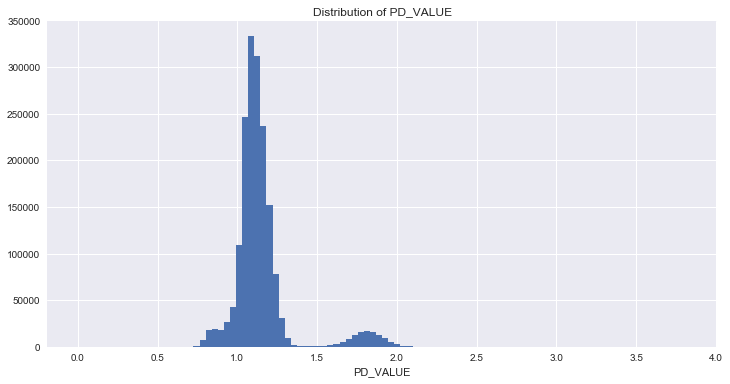

In [54]:
plt.figure(figsize=(12, 6))
plt.hist(tb_46_clear.loc[:, 'PD_VALUE'], 100)
plt.title('Distribution of PD_VALUE')  
plt.xlabel('PD_VALUE')  
plt.show()

## 表21  MT_DC_PM_MP_GD1057DATA_CUR  包装机剔除数据
## 表23  MT_DC_PM_MP_PT1057DATA_CUR  卷接机剔除数据

### 剔除代码对应表

In [55]:
rejectname = tables['MT_DC_PB_REJECTCODE'][['PM_MP_REJECTCODE_ID', 'REJECTNAME']]
rejectname.head()

,PM_MP_REJECTCODE_ID,REJECTNAME
0,9000007,烟支模盒堵塞而剔除
1,9000008,光电探测器电路板故障而剔除
2,9000009,烟支空头而剔除
3,9000010,光电探测器测出缺烟而剔除
4,9000011,手动剔除未对齐的铝箔纸数


### 包装机

In [56]:
tb21 = pd.merge(tb_21, rejectname, how='left')[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'PM_MP_REJECTCODE_ID', 'REJECTVALUE', 'REJECTNAME']]
tb21

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
0,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100046,95,盒模内存有空头烟
1,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100054,23,第三轮剔除
2,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100068,24,盒片剔除总数
3,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100071,4,盒片第二槽护门
4,2017-07-24,1,215,10001586,2017-07-24 09:51:43,6100046,5,盒模内存有空头烟
5,2016-08-18,1,212,10001586,2016-08-18 15:56:55,6100048,273,烟包剔除
6,2017-04-15,1,218,10001586,2017-04-15 15:57:18,6100022,400,条盒不全
7,2017-07-28,1,207,10001586,2017-07-28 15:10:34,6100030,47,烟包盒看片粘胶干燥
8,2017-07-27,1,219,10001586,2017-07-27 15:04:37,6100045,2,弹性壁阻塞
9,2017-07-28,1,219,10001586,2017-07-28 15:09:46,6100059,28,第六轮剔除


### 卷接机

In [57]:
tb23 = pd.merge(tb_23, rejectname, how='left')[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'PM_MP_REJECTCODE_ID', 'REJECTVALUE', 'REJECTNAME']]
tb23

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
0,2017-07-17,1,105,10001586,2017-07-17 10:14:37,105002,15,过 重
1,2016-07-27,1,107,10001586,2016-07-27 15:57:07,105003,213,软 点
2,2016-07-27,1,107,10001586,2016-07-27 15:57:07,105005,208,轻端剔出
3,2017-06-28,1,116,10001586,2017-06-28 15:59:42,107005,3133,手动剔出
4,2016-07-23,3,101,10001586,2016-07-23 01:41:00,105001,117,过 轻
5,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107003,476,空头
6,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107004,2292,缺嘴棒
7,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107005,162,手动剔出
8,2016-07-24,3,108,10001586,2016-07-24 07:17:08,105001,206,过 轻
9,2016-07-24,3,108,10001586,2016-07-24 07:17:08,105002,135,过 重


### 卷接机剔除原因种类及数量排行

In [58]:
tb23.groupby(['PM_MP_REJECTCODE_ID', 'REJECTNAME']).size().sort_values(ascending=False)

PM_MP_REJECTCODE_ID  REJECTNAME
107003               空头            660
107004               缺嘴棒           658
105002               过 重           627
107001               漏气            579
107005               手动剔出          578
105004               硬 点           561
105001               过 轻           497
105005               轻端剔出          368
105003               软 点           367
105009               SRM＿取样        141
107006               成形缺陷           18
105006               淡色点            11
107002               稀释度             9
107007               金属颗粒            7
105008               印刷不良            6
105007               深色点             5
107011               光检系统            1
dtype: int64

### 所有设备空头剔除量排行

In [59]:
tb23.query("PM_MP_REJECTCODE_ID == 107003").sort_values('REJECTVALUE', ascending=False)

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
1952,2016-07-15,2,106,10001586,2016-07-15 23:57:16,107003,47613,空头
1949,2016-07-15,2,106,10001586,2016-07-15 23:02:26,107003,41227,空头
2605,2016-07-10,3,106,10001586,2016-07-10 07:12:43,107003,32257,空头
1892,2016-07-11,2,106,10001586,2016-07-11 23:56:18,107003,26530,空头
1834,2016-07-10,3,106,10001586,2016-07-10 06:16:35,107003,25901,空头
2130,2016-06-16,1,105,10001586,2016-06-16 15:57:44,107003,22942,空头
919,2016-07-22,2,109,10001586,2016-07-22 23:57:09,107003,22011,空头
1912,2016-07-28,3,115,10001586,2016-07-28 07:17:04,107003,21374,空头
2639,2016-07-19,2,109,10001586,2016-07-19 23:57:11,107003,18018,空头
2557,2016-07-06,1,110,10001586,2016-07-06 15:57:25,107003,17657,空头


### 设备101所有班次空头剔除量

In [60]:
tb23_kt = tb23.query("PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2806,2016-06-04,3,101,10001586,2016-06-04 06:17:35,107003,1272,空头
2822,2016-06-04,3,101,10001586,2016-06-04 06:54:01,107003,1547,空头
2839,2016-07-06,2,101,10001586,2016-07-06 20:30:01,107003,2287,空头
2847,2016-07-06,2,101,10001586,2016-07-06 20:32:30,107003,2310,空头
2855,2016-07-06,2,101,10001586,2016-07-06 21:53:04,107003,2902,空头
2863,2016-07-06,2,101,10001586,2016-07-06 22:23:00,107003,3307,空头
2871,2016-07-06,2,101,10001586,2016-07-06 22:46:47,107003,3520,空头
2879,2016-07-06,2,101,10001586,2016-07-06 22:47:09,107003,3526,空头
2887,2016-07-06,2,101,10001586,2016-07-06 22:49:47,107003,3570,空头
2895,2016-07-06,2,101,10001586,2016-07-06 23:12:36,107003,3878,空头


### 设备101产生空头的日期及数量

In [61]:
tb23_kt.groupby('PRODUCEDATE').size()

PRODUCEDATE
2016-06-04     2
2016-07-06     9
2016-07-08     1
2016-07-12     1
2016-07-14     1
2016-07-15    14
2016-07-19     9
2016-07-22     4
2016-07-23    18
2017-07-19     1
2017-07-27     1
2017-07-28     1
dtype: int64

### 设备101早班空头剔除量

In [62]:
tb23_kt1 = tb23.query("PB_SHIFT_ID == 1 & PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt1

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2590,2016-07-08,1,101,10001586,2016-07-08 15:51:24,107003,4911,空头
2582,2016-07-12,1,101,10001586,2016-07-12 15:47:24,107003,4295,空头
2574,2016-07-14,1,101,10001586,2016-07-14 15:53:37,107003,3662,空头
759,2016-07-15,1,101,10001586,2016-07-15 09:01:37,107003,264,空头
1723,2016-07-15,1,101,10001586,2016-07-15 09:04:08,107003,299,空头
1751,2016-07-15,1,101,10001586,2016-07-15 09:14:14,107003,381,空头
1984,2016-07-15,1,101,10001586,2016-07-15 10:31:58,107003,847,空头
1989,2016-07-15,1,101,10001586,2016-07-15 10:35:22,107003,882,空头
1998,2016-07-15,1,101,10001586,2016-07-15 11:38:31,107003,1733,空头
2008,2016-07-15,1,101,10001586,2016-07-15 11:39:27,107003,1745,空头


### 设备101中班空头剔除量

In [63]:
tb23_kt2 = tb23.query("PB_SHIFT_ID == 2 & PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt2

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2839,2016-07-06,2,101,10001586,2016-07-06 20:30:01,107003,2287,空头
2847,2016-07-06,2,101,10001586,2016-07-06 20:32:30,107003,2310,空头
2855,2016-07-06,2,101,10001586,2016-07-06 21:53:04,107003,2902,空头
2863,2016-07-06,2,101,10001586,2016-07-06 22:23:00,107003,3307,空头
2871,2016-07-06,2,101,10001586,2016-07-06 22:46:47,107003,3520,空头
2879,2016-07-06,2,101,10001586,2016-07-06 22:47:09,107003,3526,空头
2887,2016-07-06,2,101,10001586,2016-07-06 22:49:47,107003,3570,空头
2895,2016-07-06,2,101,10001586,2016-07-06 23:12:36,107003,3878,空头
2565,2016-07-06,2,101,10001586,2016-07-06 23:50:45,107003,4229,空头
1855,2016-07-19,2,101,10001586,2016-07-19 19:51:35,107003,1432,空头


### 设备101夜班空头剔除量

In [64]:
tb23_kt3 = tb23.query("PB_SHIFT_ID == 3 & PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt3

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2806,2016-06-04,3,101,10001586,2016-06-04 06:17:35,107003,1272,空头
2822,2016-06-04,3,101,10001586,2016-06-04 06:54:01,107003,1547,空头
5,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107003,476,空头
52,2016-07-23,3,101,10001586,2016-07-23 01:41:02,107003,476,空头
1278,2016-07-23,3,101,10001586,2016-07-23 01:49:06,107003,517,空头
1918,2016-07-23,3,101,10001586,2016-07-23 01:49:08,107003,517,空头
1924,2016-07-23,3,101,10001586,2016-07-23 01:59:40,107003,587,空头
1934,2016-07-23,3,101,10001586,2016-07-23 01:59:51,107003,587,空头
2476,2016-07-23,3,101,10001586,2016-07-23 02:13:17,107003,617,空头
2483,2016-07-23,3,101,10001586,2016-07-23 03:09:44,107003,980,空头


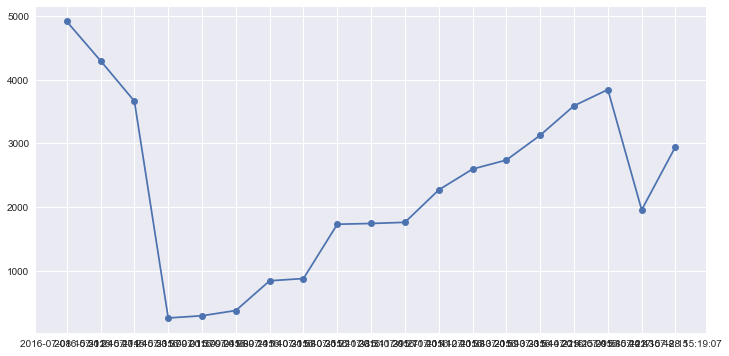

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt1['GATHERDATETIME'], tb23_kt1['REJECTVALUE'], '-o')
plt.show()

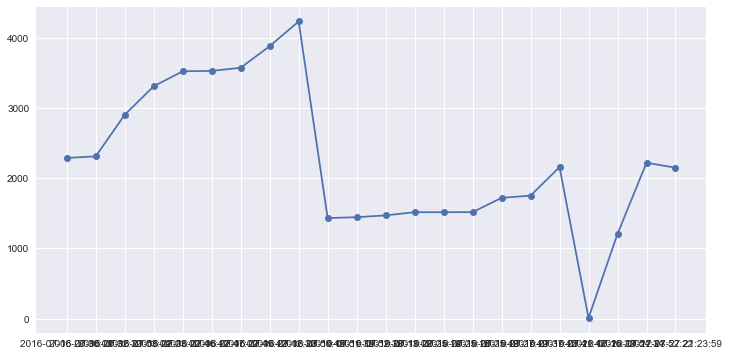

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt2['GATHERDATETIME'], tb23_kt2['REJECTVALUE'], '-o')
plt.show()

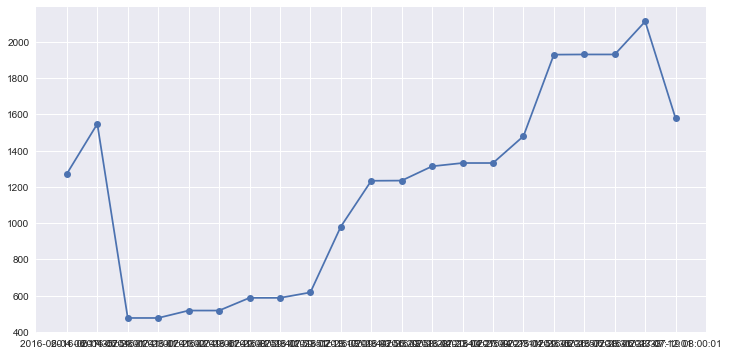

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt3['GATHERDATETIME'], tb23_kt3['REJECTVALUE'], '-o')
plt.show()

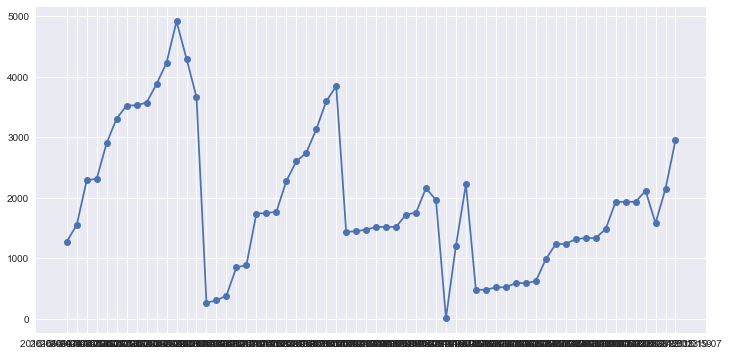

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt['GATHERDATETIME'], tb23_kt['REJECTVALUE'], '-o')
plt.show()